<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/06_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

In [7]:
!pip install datasets

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 510.5/510.5 kB 6.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [8]:
from datasets import list_datasets

In [9]:
# # ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥ Îã§Ïùå ÏΩîÎìúÎ•º Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
# !git clone https://github.com/rickiepark/nlp-with-transformers.git
# %cd nlp-with-transformers
# from install import *
# install_requirements(chapter=6)

In [10]:
from transformers import pipeline, set_seed

# Chapter 6. ÏöîÏïΩ

ÏöîÏïΩ: ÏûÖÎ†• to Ï∂úÎ†•Ïù¥ ÏûàÎäî Íµ¨Ï°∞ ‚Üí Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏Ïóê Ï†ÅÌï©

Ïù¥Î≤à Ïû• Î™©Ìëú: Ïó¨Îü¨ ÏÇ¨Î¶ºÏù¥ Ï£ºÍ≥†Î∞õÏùÄ ÎåÄÌôî ÏöîÏïΩ

## 6.1 CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖã

CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖã: 300,000Í∞ú Îâ¥Ïä§Í∏∞ÏÇ¨ + ÏöîÏïΩ<br>
3.0.0Î≤ÑÏ†ÑÏù¥ ÏùµÎ™ÖÌôî Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÏïòÎã§Îäî Í≤ÉÏùÄ Í∞úÏù∏Ï†ïÎ≥¥Î≥¥Ìò∏Î•º ÏúÑÌï¥ Î≥¥ÌÜµ Ïù¥Î¶ÑÏù¥ÎÇò Í∏∞Í¥Ä Ïù¥Î¶Ñ Îì±ÏùÑ ÏÇ≠Ï†úÌïòÎäîÎç∞, Ïù¥ Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©Ìï† ÎïåÎäî ÏÇ¨Ïö©ÏûêÍ∞Ä Í∞úÏù∏Ï†ïÎ≥¥ Î≥¥Ìò∏ÏôÄ Í¥ÄÎ†®Îêú Ïú§Î¶¨Ï†Å, Î≤ïÏ†Å Í≥†Î†§ÏÇ¨Ìï≠Ïóê Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïó¨ÏÑú ÏÇ¨Ïö©ÌïòÎùºÎäî ÏùòÎèÑ...

In [11]:
from datasets import load_dataset

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
# dataset = load_dataset("cnn_dailymail", version="3.0.0")
dataset = load_dataset("ccdv/cnn_dailymail", version="3.0.0")
print(f"ÌäπÏÑ±: {dataset['train'].column_names}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  wa

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

ÌäπÏÑ±: ['article', 'highlights', 'id']


In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [13]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [14]:
import pickle

In [15]:
with open('dataset.pickle','wb') as  fw:
  pickle.dump(dataset, fw)

In [16]:
with open('dataset.pickle', 'rb') as fr:
  data_loaded = pickle.load(fr)

In [12]:
data_loaded

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

id: Í∏∞ÏÇ¨ Í≥†Ïú† ÏïÑÏù¥Îîî

In [13]:
sample = dataset["train"][1]
print(f"""Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: {len(sample["article"])}):""")
print(sample["article"][:800])
print(f'\nÏöîÏïΩ (Í∏∏Ïù¥: {len(sample["highlights"])}):')
print(sample["highlights"])
print('\n')
print(sample["id"])

Í∏∞ÏÇ¨ (500Í∞ú Î¨∏Ïûê Î∞úÏ∑å, Ï¥ù Í∏∏Ïù¥: 3192):
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I'

ÏöîÏïΩ (Í∏∏Ïù¥: 180):
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships f

‚Äª ÎåÄÎ∂ÄÎ∂ÑÏùò Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò Î¨∏Îß• ÌÅ¨Í∏∞Îäî 1,000Í∞ú ÌÜ†ÌÅ∞ Ï†ïÎèÑÎ°ú Ï†úÌïú<br>
Í∏¥ Í∏∞ÏÇ¨Ïùò Í≤ΩÏö∞ Î¨∏Îß• ÌÅ¨Í∏∞ Ï†úÌïúÏóê ÎßûÏ∂∞ ÏûòÎùºÏïº...

In [ ]:
sample

{'article': '(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men\'s 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I\'m proud of myself and I\'ll continue to work to dominate for as long as possible," Bolt said, having previously expressed his intention to carry on until the 2016 Rio Olympics. Victory 

## 6.2 ÌÖçÏä§Ìä∏ ÏöîÏïΩ ÌååÏù¥ÌîÑÎùºÏù∏

ÏûÖÎ†• ÌÖçÏä§Ìä∏ 2,000Ïûê Ï†úÌïú

In [14]:
sample_text = dataset["train"][1]["article"][:2000]
# ÎîïÏÖîÎÑàÎ¶¨Ïóê Í∞Å Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÏöîÏïΩÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
summaries = {}

ÏöîÏïΩÏóêÏÑúÎäî Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú ÏöîÏïΩ Î¨∏Ïû• Ï§ÑÎ∞îÍøàÏúºÎ°ú ÎÇòÎàî<br>
ÎßàÏπ®ÌëúÎßàÎã§ Í∑∏ Îí§Ïóê Ï§ÑÎ∞îÍøàÏùÑ ÌïòÍ≤åÎêòÎ©¥ Íµ¨ÎëêÏ†êÏù¥ Ìè¨Ìï®Îêú ÏïΩÏñ¥ U.S.Ïù¥ÎÇò U.N. Í∞ôÏùÄ Î¨∏ÏûêÏó¥ÏùÑ Ï≤òÎ¶¨ÌïòÎäîÎç∞ Î¨∏Ï†úÍ∞Ä Îê®<br>
NLTK Ìå®ÌÇ§ÏßÄÏóêÎäî Î¨∏Ïû•Ïùò Ï¢ÖÍ≤∞Í≥º ÏïΩÏñ¥Ïóê Îì±Ïû•ÌïòÎäî Íµ¨ÎëêÏ†êÏùÑ Íµ¨Î≥ÑÌïòÎäî Ï†ïÍµêÌïú ÏïåÍ≥†Î¶¨Ï¶ò Ìè¨Ìï®

In [18]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

punkt ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î™®Îìà: Î¨∏Ïû• Í≤ΩÍ≥ÑÎ•º ÏûêÎèô ÏãùÎ≥ÑÌïòÎèÑÎ°ù ÌõàÎ†®Îêú Î®∏Ïã†Îü¨Îãù Î™®Îç∏(ÏïΩÏñ¥, Ïù¥Î©îÏùº Ï£ºÏÜå, Ïõπ Ï£ºÏÜå Îì± Î¨∏Ïû• Î∂ÑÎ¶¨ ÏµúÏÜåÌôî)

In [ ]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

### 6.2.1 ÏöîÏïΩ Í∏∞Ï§Ä Î™®Îç∏

ÏùºÎ∞òÏ†ÅÏù∏ Í∏∞Ï§Ä Î™®Îç∏(baseline)ÏùÄ Îã®ÏàúÌûà Í∏∞ÏÇ¨ Ï≤òÏùå ÏÑ∏ Î¨∏Ïû•ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤É

In [ ]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])                                   # Ï≤´ 3Î¨∏Ïû• ÏÑ†ÌÉù

In [ ]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [ ]:
summaries["baseline"]

"(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay.\nThe fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds.\nThe U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover."

### 6.2.2 GPT-2

GPT-2ÏóêÏÑú ÏûÖÎ†• ÌÖçÏä§Ìä∏ Îí§Ïñ¥ 'TL;DR'ÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ ÏöîÏïΩÏùÑ ÏÉùÏÑ±Ìï®<br>
too long:didn't read<br>
Î†àÎîß Í∞ôÏùÄ ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú Í∏¥ Ìè¨Ïä§Ìä∏Î•º ÏßßÍ≤å ÏöîÏïΩÌï† Îïå ÏÇ¨Ïö©

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)                                                                    # Ï∞∏Í≥†

# ÏΩîÎû©Ïùò Í≤ΩÏö∞ gpt2-xlÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# ÎåÄÏã† "gpt" ÎòêÎäî "gpt2-large"Î°ú ÏßÄÏ†ïÌïòÍ±∞ÎÇò ÏΩîÎû© ÌîÑÎ°úÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
# pipe = pipeline("text-generation", model="gpt2-xl")
pipe = pipeline("text-generation", model="gpt2-large")

gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

max_length: ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ ÏµúÎåÄ Í∏∏Ïù¥<br>
clean_up_tokenization_spaces: ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†úÏù¥ÏÖò ÌõÑ ÏÉùÏÑ±Îêú Í≥µÎ∞±ÏùÑ Ï†ïÎ¶¨Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ï. TrueÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ Î™®Îç∏ Ï∂úÎ†•ÏóêÏÑú Î∂àÌïÑÏöîÌïú Í≥µÎ∞±Ïù¥ Ï†úÍ±∞ÎêòÏñ¥ Îçî ÍπîÎÅîÌïú ÌÖçÏä§Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÏùå. ÏòàÎ•º Îì§Ïñ¥, ÌäπÏ†ï ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎäî Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê ÏÇ¨Ïù¥Ïóê Î∂àÌïÑÏöîÌïú Í≥µÎ∞±ÏùÑ ÏÇΩÏûÖÌï† Ïàò ÏûàÎäîÎç∞, Ïù¥ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ïù¥Îü¨Ìïú Í≥µÎ∞±ÏùÑ Ï†úÍ±∞ÌïòÎäî Îç∞ ÎèÑÏõÄ.


In [ ]:
summaries["gpt2"]

'Bolt finished in the top 5 with a time of 4:03.48 in 2:47.01, beating Gatlin who was 5th with a time of 4:06.82.\nHe won his first world titles in 2012 but has not been as dominant over the years.\nDespite only having made two appearances at the world championships in the last few years, with both coming in the same'

### 6.2.3 T5

Text-to-Text Transfer Transformer Î™®Îç∏<br>
T5Îäî ÏöîÏïΩÏùÑ Ìè¨Ìï®Ìï¥ ÎßàÏä§ÌÇπ Îã®Ïñ¥ Ïû¨Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú ÎπÑÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÏñ¥ ÌõàÎ†®<br>

<img alt="T5" width="700" caption="Diagram of T5's text-to-text framework (courtesy of Colin Raffel); besides translation and summarization, the CoLA (linguistic acceptability) and STSB (semantic similarity) tasks are shown" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_t5.png?raw=1" id="T5"/>

ÌÖçÏä§Ìä∏-Ìà¨-ÌÖçÏä§Ìä∏ ÌîÑÎ†àÏûÑÏõåÌÅ¨<br>
Î≤àÏó≠, ÏöîÏïΩ, CoLA(The Corpus of linguistic acceptability, Ïñ∏Ïñ¥ÌïôÏ†Å ÏàòÏö©ÏÑ± ÌèâÍ∞Ä, Î¨∏Î≤ïÏ†ÅÏúºÎ°ú ÏàòÏö©Í∞ÄÎä•ÌïúÏßÄ Ïó¨Î∂Ä), STSB(The semantic Textual Similarity Benchmark, Îëê Î¨∏Ïû• ÏÇ¨Ïù¥Ïùò Ïú†ÏÇ¨ÏÑ± ÌèâÍ∞Ä) Í∞ÄÎä•

In [19]:
pipe = pipeline("summarization", model="t5-large")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [20]:
summaries["t5"]

"usain bolt wins his third gold medal of the world championships in the men's 4x100m relay .\nthe 26-year-old anchored Jamaica to victory in the event in the Russian capital .\nhe has now collected eight gold medals at the championships, equaling the record ."

ÏöîÏïΩ Í¥úÏ∞ÆÏùå

### 6.2.4 BART

facebook AI Ïó∞Íµ¨ÌåÄ<br>
Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Íµ¨Ï°∞<br>
ÏöîÏïΩ, Î≤àÏó≠, Î¨∏Ïû• ÏÉùÏÑ± Îì± Îã§ÏñëÌïú NLPÏûëÏóÖÏóê Ìö®Í≥ºÏ†Å<br>
ÏÜêÏÉÅÎêú ÏûÖÎ†•ÏùÑ Ïû¨Íµ¨ÏÑ±ÌïòÎèÑÎ°ù ÌõàÎ†®<br>
BERT Ïù∏ÏΩîÎçîÏôÄ GPT-2 ÎîîÏΩîÎçî Í≤∞Ìï©<br>
ÎÖ∏Ïù¥Ï¶àÎ•º Ï∂îÍ∞ÄÌïòÍ≥† Î≥µÏõêÌïòÍ∏∞(denoising autoencoder): ÏûÖÎ†• ÌÖçÏä§Ìä∏Ïóê ÏùºÎ∂ÄÎü¨ ÎÖ∏Ïù¥Ï¶à(Îã®Ïñ¥ ÏàúÏÑúÎ•º Îí§ÏÑûÍ±∞ÎÇò, ÏùºÎ∂Ä Îã®Ïñ¥Î•º ÎßàÏä§ÌÇπÌïòÍ±∞ÎÇò ÏÇ≠Ï†úÌïòÎäî Îì±)ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥†, Ïù¥ÌõÑ ÏõêÎ≥∏ ÌÖçÏä§Ìä∏Î•º Î≥µÏõêÌïòÎ†§Í≥† ÏãúÎèÑÌïòÎ©¥ÏÑú ÌïôÏäµ

In [21]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [ ]:
summaries["bart"]

"Usain Bolt wins his third gold of the world championships in Moscow.\nBolt anchors Jamaica to victory in the men's 4x100m relay.\nThe 26-year-old has now won eight gold medals at world championships.\nJamaica's women also win gold in the relay, beating France in the process."

ÏöîÏïΩ Í¥úÏ∞ÆÏùå

### 6.2.5 PEGASUS

Pre-training with Extracted Gap-sentences for Abstractive SUmmarization Sequence-to-sequence models<br>
Google Research<br>
Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏<br>
ÎßàÏä§ÌÇπ Î¨∏Ïû•ÏùÑ ÏòàÏ∏°Ìïú Í≤ÉÏùÑ Î™©ÌëúÎ°ú pretrained<br>
Î¨∏ÏÑúÏóêÏÑú Ï§ëÏöîÌïú Î¨∏Ïû•Îì§ÏùÑ ÏãùÎ≥ÑÌïòÍ≥†, Ïù¥Î•º "Í∞≠(gap)"ÏúºÎ°ú ÎÇ®Í≤®ÎëêÎ©∞ ÎÇòÎ®∏ÏßÄ Î¨∏ÏÑúÎ•º Ïù¥Ïö©Ìï¥ ÏÇ¨Ï†Ñ ÌïôÏäµÏùÑ ÏàòÌñâ<br>
Îπ†ÏßÑ Î¨∏Ïû• Î≥µÏõêÏùÑ ÏãúÎèÑÌïòÎ©¥ÏÑú Î¨∏ÏÑú ÎÇ¥ Ï§ëÏöî Ï†ïÎ≥¥ Ï∂îÏ∂ú Î∞è ÏöîÏïΩÌïòÎäî Î≤ïÏùÑ ÌïôÏäµ

<img alt="pegasus" width="700" caption="Diagram of PEGASUS architecture (courtesy of Jingqing Zhang et al.)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter08_pegasus.png?raw=1" id="pegasus"/>

Î™®Îç∏ ÎÇ¥Ïóê Ï§ÑÎ∞îÍøà ÌäπÏàò ÌÜ†ÌÅ∞Ïù¥ ÏûàÏñ¥ sent_tokenize() Ìï®Ïàò ÌïÑÏöîÏóÜÏùå

In [ ]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
summaries["pegasus"]

"Usain Bolt wins third gold of world championships.\nAnchors Jamaica to victory in men's 4x100m relay.\nEighth gold at the championships for Bolt.\nJamaica also win women's 4x100m relay ."

Í¥úÏ∞ÆÍ≤å ÏöîÏïΩÎêú Í≤É Í∞ôÏùå

## 6.3 ÏöîÏïΩ Í≤∞Í≥º ÎπÑÍµêÌïòÍ∏∞

GTP-2: Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†ÑÌòÄ ÌõàÎ†®ÎêòÏßÄ ÏïäÏùå(ÏöîÏïΩÏùÑ ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÌõàÎ†®ÎêòÏßÄ ÏïäÏïòÎã§Îäî Í≤ÉÏù∏ÏßÄ?)<br>
T5: ÏöîÏïΩÏùÑ ÏúÑÌï¥ ÎØ∏ÏÑ∏ ÌäúÎãùÎê®<br>
BART, PEGASUS: ÏöîÏïΩÎßåÏùÑ ÏúÑÌï¥ ÎØ∏ÏÑ∏ ÌäúÎãù

In [ ]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .

BASELINE
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his
third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m
relay.
The fastest man in the world charged clear of United States rival Justin Gatlin
as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and
Bolt won in 37.36 seconds.
The U.S finished second in 37.56 seconds with Canada taking the bronze after
Britain were disqualified for a faulty handover.

GPT2
Bolt finished in the top 5 with a time of 4:03.48 in 2:47.01, beating Gatlin who
was 5th with a time of 4:06.82.
He won his first world titles in 2012 but has not been as dominant over the
years.
Despite only having made two appearances at the world championships in the last
few years, with both coming in the same


Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Ï¢ãÏùÄÏßÄ ÌåêÎã® Í∏∞Ï§ÄÏóê ÎåÄÌï¥ Í∂ÅÍ∏à<br>
ÏßÄÌëú ÌïòÎÇòÎ•º Ï†ïÏùòÌïòÍ≥† ÌäπÏ†ï Î≤§ÏπòÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î™®Îì† Î™®Îç∏ ÌèâÍ∞ÄÌï¥ ÏÑ±Îä•Ïù¥ ÏµúÍ≥†Ïù∏ Î™®Îç∏ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†ÅÏù¥ÎÇò ÏßÄÌëúÎ•º Ïñ¥ÎñªÍ≤å Ï†ïÏùòÌï¥ÏïºÌïòÎäêÎÉêÍ∞Ä Î¨∏Ï†ú<br>
ÌÖçÏä§Ìä∏ ÌíàÏßà Ï∏°Ï†ïÏùÑ ÏúÑÌïú ÏùºÎ∞òÏ†ÅÏù∏ ÏßÄÌëú ÌïÑÏöî<br>

## 6.4 ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌíàÏßà ÌèâÍ∞ÄÌïòÍ∏∞

ÏÉùÏÑ± ÌÖçÏä§Ìä∏ ÌèâÍ∞Ä ÏßÄÌëú<br>
ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêòÎäî Îëê ÏßÄÌëú BLEUÏôÄ ROUGE ÏÜåÍ∞ú

### 6.4.1 BLEU

Bilingual Evaluation Understudy<br>
Îã®Ïñ¥ or n-Í∑∏Îû® Ï≤¥ÌÅ¨<br>
Ï†ïÎ∞ÄÎèÑ Í∑ºÍ∞ÑÏúºÎ°úÌïòÎäî ÏßÄÌëú<br>
**Îëê ÌÖçÏä§Ìä∏(ÏÉùÏÑ± ÌÖçÏä§Ìä∏ÏôÄ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏) ÎπÑÍµêÌï† Îïå Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Îã®Ïñ¥Í∞Ä ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ Ïπ¥Ïö¥Ìä∏, Í∑∏ ÌõÑ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î°ú ÎÇòÎàî<br>
Îã®Ï†ê: ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÎèôÏùº Îã®Ïñ¥ Î∞òÎ≥µÌïòÍ≥† Ïù¥ Îã®Ïñ¥Í∞Ä Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÏùÑ Í≤ΩÏö∞ ‚Üí Ï†ïÎ∞ÄÎèÑ ÎÜíÏùå<br>
Î≥¥ÏôÑ: Îã®Ïñ¥Î•º Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê Îì±Ïû•Ìïú ÌöüÏàòÎßåÌÅºÎßå Ïπ¥Ïö¥Ìä∏<br>
Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏: 'the cat is on the mat'<br>
ÏÉùÏÑ± ÌÖçÏä§Ìä∏: 'the the the the the the'<br>



Ï†ïÎ∞ÄÎèÑ Í≥ÑÏÇ∞(vanilla precision vs modified precision)

Pvanilla = Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Îã®Ïñ¥Í∞Ä ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ Ïπ¥Ïö¥Ìä∏ / ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Í∏∏Ïù¥<br>
Pmod = ÏÉùÏÑ± ÌÖçÏä§Ìä∏Ïùò Îã®Ïñ¥Í∞Ä Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê Îì±Ïû•Ìïú ÌöüÏàòÎßåÌÅºÎßå Ïπ¥Ïö¥Ìä∏ / ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ Í∏∏Ïù¥

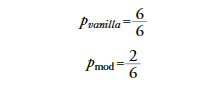

PmodÎ°ú Îã®Ï†êÏùÑ Í∑πÎ≥µÌïòÏòÄÎã§...

---------------------------

ÏúÑÎäî Îã®Ïñ¥Ïóê ÎåÄÌïú Ï†ïÎ∞ÄÎèÑ Í≥ÑÏÇ∞Ïù¥Í≥†<br>
ÏïÑÎûò Ï™ΩÏùÄ Pmod n-Í∑∏Îû® Ï≤¥ÌÅ¨Î°ú ÌôïÏû•ÌïòÏó¨ ÏÑ§Î™Ö Í≥ÑÏÜç ÏßÑÌñâ

‚Äª n-gram: Ïó∞ÏÜçÎêú 'n'Í∞úÏùò Ìï≠Î™©(Ïù¥ Í≤ΩÏö∞ Ï£ºÎ°ú Îã®Ïñ¥ÎÇò Î¨∏Ïûê)Ïùò ÏãúÌÄÄÏä§Î•º ÏùòÎØ∏<br>
- n-Í∑∏Îû®Ïùò ÏòàÏãú:<br>
-- 1-Í∑∏Îû®(Unigram): Îã®Ïùº Ìï≠Î™©(Ïòà: Îã®Ïñ¥ÎÇò Î¨∏Ïûê)ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.<br> ÏòàÎ•º Îì§Ïñ¥, Î¨∏Ïû• "The cat sat on the mat"Ïùò 1-Í∑∏Îû®ÏùÄ "The", "cat", "sat", "on", "the", "mat"ÏûÖÎãàÎã§.<br>
-- 2-Í∑∏Îû®(Bigram): Ïó∞ÏÜçÎêú Îëê Ìï≠Î™©Ïùò ÏãúÌÄÄÏä§Î•º ÏùòÎØ∏Ìï©ÎãàÎã§.<br> Í∞ôÏùÄ Î¨∏Ïû•ÏóêÏÑúÏùò 2-Í∑∏Îû®ÏùÄ "The cat", "cat sat", "sat on", "on the", "the mat"ÏûÖÎãàÎã§.<br>
-- 3-Í∑∏Îû®(Trigram): Ïó∞ÏÜçÎêú ÏÑ∏ Ìï≠Î™©Ïùò ÏãúÌÄÄÏä§ÏûÖÎãàÎã§.<br> ÏòàÎ°ú "The cat sat", "cat sat on", "sat on the", "on the mat"Í∞Ä ÏûàÏäµÎãàÎã§

ÏÉùÏÑ± ÌÖçÏä§Ìä∏ÏôÄ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Î•º ÎπÑÍµêÌï† Í≤ΩÏö∞<br>
ÏÉùÏÑ± ÌÖçÏä§Ìä∏ snt ÏóêÏÑú n-gram Ïàò (Î∂ÑÎ™®) vs Ï∞∏Ï°∞ Î¨∏Ïû• snt'ÏóêÏÑú n-gram Îì±Ïû• ÌöüÏàò (Î∂ÑÏûê)

Î∞òÎ≥µÏ†ÅÏù∏ ÏÉùÏÑ±Ïóê Î≥¥ÏÉÅÏùÑ Ï£ºÏßÄÏïäÎèÑÎ°ù Î∂ÑÏûêÏùò Ïπ¥Ïö¥Ìä∏Î•º ÌÅ¥Î¶¨ÌïëÌï®<br>
‚Üí ÏÉùÏÑ±Îêú Î¨∏Ïû•ÏóêÏÑú n-Í∑∏Îû®Ïùò Îì±Ïû• ÌöüÏàòÎ•º Ïπ¥Ïö¥Ìä∏ÌïòÎäî Í≤ÉÏù¥ Ï∞∏Ï°∞ Î¨∏Ïû•Ïóê ÎÇòÌÉÄÎÇú ÌöüÏàòÎ°ú Ï†úÌïú

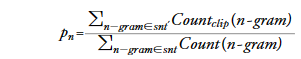

ÏòàÏãú. 2-gramÏù∏ Í≤ΩÏö∞

* chatGPTÎ°ú ÏòàÏãúÎ•º ÎßåÎì§Ïñ¥ÏÑú Î≤àÏó≠ÏúºÎ°ú ÌëúÍ∏∞ÎêòÏóàÏúºÎÇò Ïó¨Í∏∞ÏÑúÎäî ÏöîÏïΩÏúºÎ°ú ÏÉùÍ∞ÅÌïòÏó¨ Ïù¥Ìï¥Ìï¥Ï£ºÏÑ∏Ïöî.

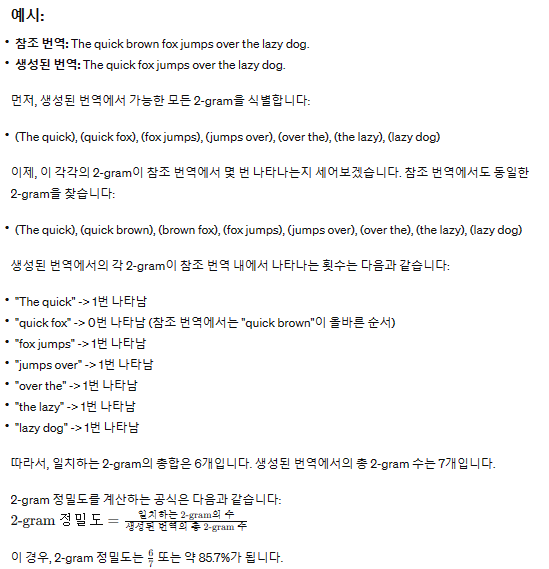

---------------------------

ÎßêÎ≠âÏπò CÏóê ÏûàÎäî Î™®Îì† Î¨∏Ïû•ÏúºÎ°ú ÌôïÏû•ÌñàÏùÑ Í≤ΩÏö∞

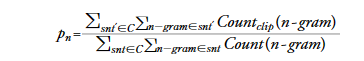

ÏòàÏãú. 2Î¨∏Ïû• ÎßêÎ≠âÏπò CÏóê ÎåÄÌï¥ BLEU Í≥ÑÏÇ∞

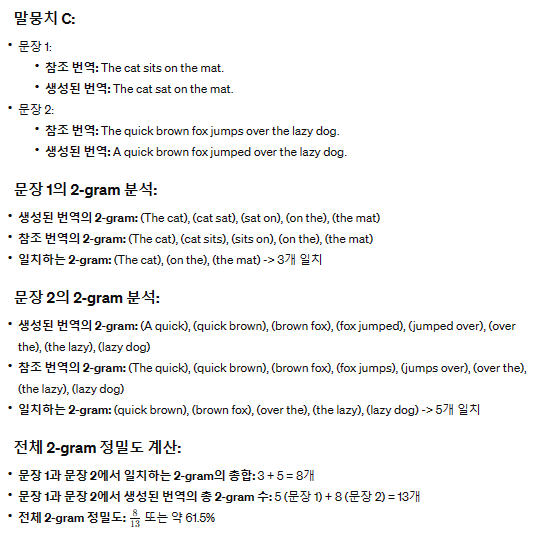

BLEUÎäî Î≤àÏó≠Îêú ÌÖçÏä§Ìä∏Í∞Ä Ï∞∏Ï°∞ Î≤àÏó≠ÏùÑ ÏñºÎßàÎÇò Ïûò "Ïû¨ÌòÑ"ÌïòÎäîÏßÄÎ≥¥Îã§Îäî,<br> Î≤àÏó≠Îêú ÌÖçÏä§Ìä∏ ÎÇ¥Ïùò n-gramÏù¥ Ï∞∏Ï°∞ Î≤àÏó≠Í≥º ÏñºÎßàÎÇò Ï†ïÌôïÌïòÍ≤å "ÏùºÏπò"ÌïòÎäîÏßÄÏóê Îçî ÌÅ∞ ÎπÑÏ§ëÏùÑ Îë°ÎãàÎã§.<br>


-------------------------

Î∏åÎ†àÎπÑÌã∞ ÌéòÎÑêÌã∞(Brevity penalty)<br>
- Í∏∞Í≥Ñ Î≤àÏó≠Îêú ÌÖçÏä§Ìä∏Í∞Ä Ï∞∏Ï°∞ Î≤àÏó≠Î≥¥Îã§ ÎÑàÎ¨¥ ÏßßÏùÑ Í≤ΩÏö∞ Ï†ÅÏö©ÎêòÎäî Ìå®ÎÑêÌã∞
- Ïù¥ Î©îÏª§ÎãàÏ¶òÏùÄ Î≤àÏó≠Îêú ÌÖçÏä§Ìä∏Í∞Ä Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïóê ÎπÑÌï¥ ÎÑàÎ¨¥ Í∞ÑÍ≤∞ÌïòÍ≤å ÏöîÏïΩÎêòÏñ¥ Ï†ïÎ≥¥Í∞Ä ÏÜêÏã§ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥
- ÏßßÏùÄ Î≤àÏó≠ÏùÄ Ï†ïÎ∞ÄÎèÑÎ•º Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÎÜíÏùº Ïàò ÏûàÏúºÎÇò, Ïù¥Îäî Î∞òÎìúÏãú ÎÜíÏùÄ ÌíàÏßàÏùò Î≤àÏó≠ÏùÑ ÏùòÎØ∏ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏

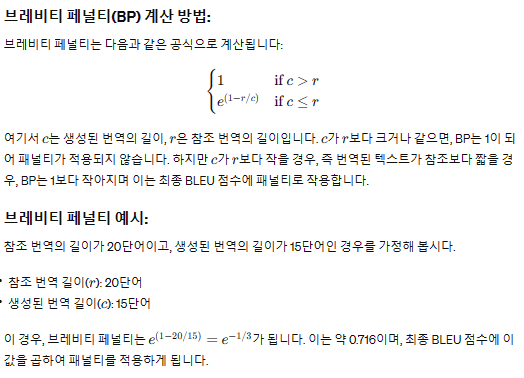

ÏµúÏ¢ÖÏ†ÅÏù∏ BLEU Ï†êÏàò Í≥µÏãù<br>
1ÏóêÏÑú NÍπåÏßÄ n-Í∑∏Îû®ÏóêÏÑú ÏàòÏ†ï Ï†ïÎ∞ÄÎèÑÏùò Í∏∞Ìïò ÌèâÍ∑†

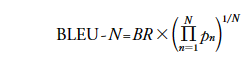

BLEU-4 Ï†êÏàòÍ∞Ä ÎßéÏù¥ ÏÇ¨Ïö©Îê®

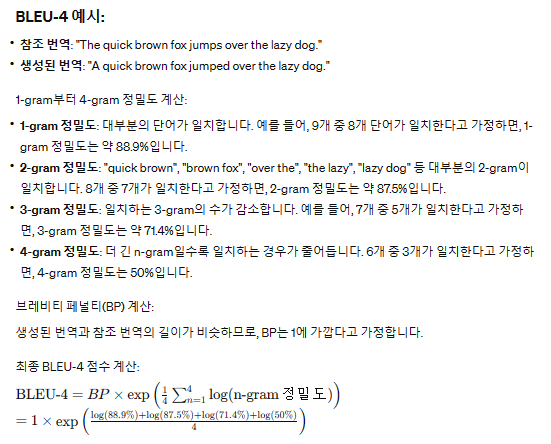

BLEU Îã®Ï†ê
- ÎèôÏùòÏñ¥Î•º Í≥†Î†§ÌïòÏßÄ ÏïäÏùå
- Ïú†ÎèÑÎêú ÏãùÏùò ÎßéÏùÄ Îã®Í≥ÑÍ∞Ä ÏûÑÏãúÎ∞©Ìé∏Ïù¥Í≥† Íπ®ÏßÄÍ∏∞ Ïâ¨ÏõÄ
- ÌÜ†ÌÅ∞ÌôîÎêú ÌÖçÏä§Ìä∏Î•º Í∏∞ÎåÄ(ÌÜ†ÌÅ∞ÌôîÎ•º Ï†ïÌôïÌûà Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú ÌïòÏßÄ ÏïäÏúºÎ©¥ Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßê)<br>
‚Üí SacreBLEUÎäî ÌÜ†ÌÅ∞Ìôî Îã®Í≥ÑÎ•º ÎÇ¥Ïû¨ÌôîÌïòÏó¨ Ïù¥ Î¨∏Ï†ú Ìï¥Í≤∞

---------------------------------

SacreBLEU Ïã§Ïäµ<br>
Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï∏°Ï†ïÏßÄÌëúÎèÑ Ï†úÍ≥µ

In [ ]:
!pip install evaluate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import evaluate

bleu_metric = evaluate.load("sacrebleu")

add() ÏÉòÌîå ÌïòÎÇò Ï∂îÍ∞Ä<br>
add_batch() Î∞∞Ïπò Ï†ÑÏ≤¥ Ï∂îÍ∞Ä<br>
compute() ÏßÄÌëú Í≥Ñ<br>
smooth_method="floor"ÏôÄ smooth_value=0Îäî Ï†êÏàò Í≥ÑÏÇ∞ Ïãú ÏÇ¨Ïö©ÎêòÎäî ÌèâÌôúÌôî Î∞©Î≤ïÍ≥º Í∑∏ Í∞í


In [ ]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                          0.0
counts                [2, 0, 0, 0]
totals                [6, 5, 4, 3]
precisions  [33.33, 0.0, 0.0, 0.0]
bp                             1.0
sys_len                          6
ref_len                          6

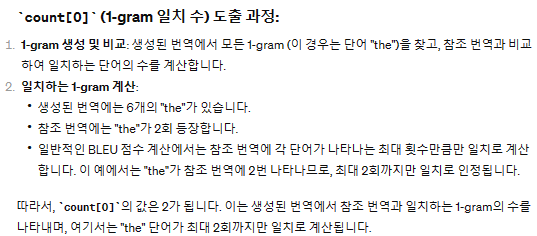

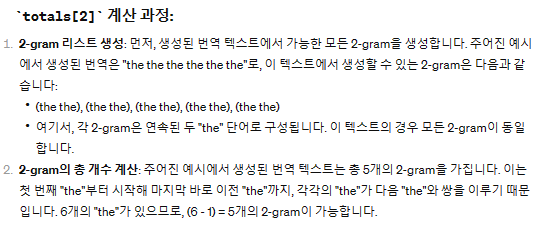

In [ ]:
bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                        57.893007
counts                    [5, 3, 2, 1]
totals                    [5, 4, 3, 2]
precisions  [100.0, 75.0, 66.67, 50.0]
bp                            0.818731
sys_len                              5
ref_len                              6

‚Äª ÌèâÌôúÌôîÎäî ÌäπÌûà ÏÉùÏÑ±Îêú Î≤àÏó≠ÏóêÏÑú ÌäπÏ†ï n-gramÏù¥ Ï∞∏Ï°∞ Î≤àÏó≠Ïóê Ï†ÑÌòÄ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏùÑ Îïå(Ï¶â, Ï†ïÎ∞ÄÎèÑÍ∞Ä 0Ïùº Îïå) Î∞úÏÉùÌï† Ïàò ÏûàÎäî Í≥ÑÏÇ∞ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê©ÎãàÎã§. Ï†ïÎ∞ÄÎèÑÍ∞Ä 0Ïù∏ n-gramÏù¥ Ï°¥Ïû¨ÌïòÎ©¥, BLEU Ï†êÏàòÏùò Í∏∞Ìïò ÌèâÍ∑† Í≥ÑÏÇ∞ÏóêÏÑú Ï†ÑÏ≤¥ Ï†êÏàòÍ∞Ä 0Ïù¥ ÎêòÎäî Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÌèâÌôúÌôîÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. <br>
 smooth_valueÎ•º 1Î°ú ÏÑ§Ï†ïÌïòÎ©¥, Î™®Îì† n-gram Ï†ïÎ∞ÄÎèÑ Í≥ÑÏÇ∞Ïóê ÏµúÏÜåÌïú 1Ïùò Í∞íÏù¥ Ï∂îÍ∞ÄÎê©ÎãàÎã§. Ïù¥Îäî ÌäπÌûà ÏÉùÏÑ±Îêú Î≤àÏó≠ÏóêÏÑú ÎÜíÏùÄ n-gram(Ïòà: 4-gram)Ïù¥ Ï∞∏Ï°∞ Î≤àÏó≠Ïóê Ï†ÑÌòÄ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏïÑ Ï†ïÎ∞ÄÎèÑÍ∞Ä 0Ïù∏ Í≤ΩÏö∞Ïóê Ïú†Ïö©Ìï©ÎãàÎã§. ÌèâÌôúÌôîÎ•º ÌÜµÌï¥ Ïù¥Îü¨Ìïú n-gramÏóê ÏûëÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÏó¨, ÏµúÏ¢Ö BLEU Ï†êÏàòÍ∞Ä 0Ïù¥ ÎêòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ≥†, Î≥¥Îã§ ÌòÑÏã§Ï†ÅÏù∏ Î≤àÏó≠ ÌíàÏßà ÌèâÍ∞ÄÎ•º Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.

BLEU Ï†êÏàòÎäî Í∏∞Í≥Ñ Î≤àÏó≠Ïóê ÎßéÏù¥ Ïì∞Ïù∏Îã§.<br>
Í∞ÄÎä•ÌïòÍ≥† Ï†ÅÌï©Ìïú Îã®Ïñ¥Î•º Î™®Îëê Ìè¨Ìï®ÌïòÎäî Î≤àÏó≠Î≥¥Îã§ Ï†ïÌôïÌïú Î≤àÏó≠Ïù¥ ÏÑ†Ìò∏ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê...

### 6.4.2 ROUGE

Ïó¨Í∏∞ÏÑú ROUGE-N, ROUGE-L Íµ¨Î∂ÑÌï† Ï§Ñ ÏïåÏïÑÏïº...
(ÍµêÏû¨ÏóêÎäî Ïñ∏Í∏âÎêòÏñ¥ ÏûàÏßÄÏïäÏùÄ ROUGE-W, ROUGE-SÎèÑ ÏûàÏùå)

Recall-Oriented Understudy for Gisting Evaluation

ÏöîÏïΩ Í∞ôÏùÄ Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏóêÎäî Ï§ëÏöîÌïú Ï†ïÎ≥¥Í∞Ä ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê Î™®Îëê Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïòÎØÄÎ°ú ÎÜíÏùÄ Ïû¨ÌòÑÏú®Ïù¥ ÏÑ†Ìò∏ÎêúÎã§.
‚ÜíROUGE

ÏÉùÏÑ± ÌÖçÏä§Ìä∏ÏôÄ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ÏóêÏÑú Ïó¨Îü¨ n-Í∑∏Îû®Ïù¥ ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ ÎπÑÍµêÌïúÎã§Îäî Ï†êÏóêÏÑú BLEUÏôÄ Ïú†ÏÇ¨<br>
ROUGEÎäî **Î∂ÑÎ™®ÏóêÏÑú Ï∞∏Ï°∞ ÌÖåÏä§Ìä∏Ïóê ÏûàÎäî n-Í∑∏Îû®Ïù¥ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÎßéÏù¥ Îì±Ïû•ÌïòÎäîÏßÄÎèÑ ÌôïÏù∏**ÌïúÎã§Îäî Ï†êÏù¥ Îã§Î¶Ñ

ROUGEÎäî Î∂ÑÎ™®ÏóêÏÑú Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏Ïùò n-Í∑∏Îû®Ïù¥ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Ïóê ÏñºÎßàÎÇò ÎßéÏù¥ Îì±Ïû•ÌïòÎäîÏßÄ ÌÅ¥Î¶¨ÌïëÌïòÏßÄ ÏïäÍ≥† Ïπ¥Ïö¥Ìä∏ÌïòÎèÑÎ°ù Ï†ïÎ∞ÄÎèÑ Í≥µÏãù ÏàòÏ†ï

Í∑∏ÎÉ• Î∂ÑÎ™®Í∞Ä **Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏** n-Í∑∏Îû®Ïùò ÏàòÎã§...<br>
BLEUÏóêÏÑúÎäî Î∂ÑÎ™®Í∞Ä **ÏÉùÏÑ± ÌÖçÏä§Ìä∏** n-Í∑∏Îû® Ïàò

ROUGE Í∏∞Î≥∏ Í≥µÏãù(Îí§ÏóêÏÑú Í∞úÏÑ†ÎêúÎã§...)

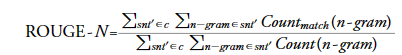

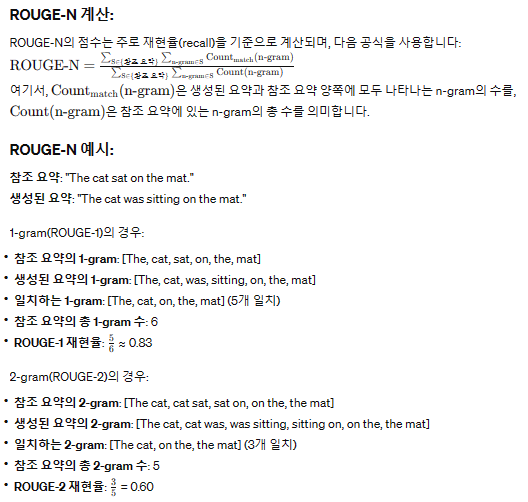

‚Äª BLUE-1 Í≥ÑÏÇ∞Í≥º ÎπÑÍµê

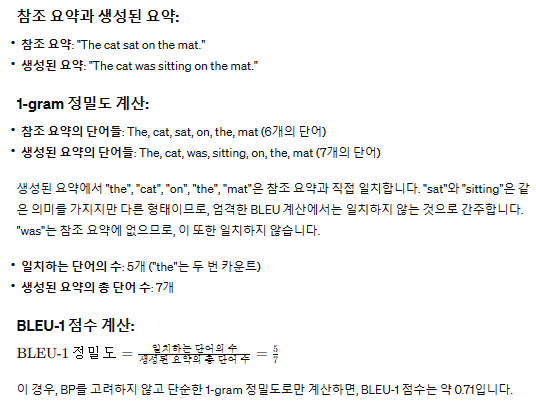

-------------------------------

Ï†ïÎ∞ÄÎèÑÎ•º ÏôÑÏ†ÑÌûà Ï†úÍ±∞ÌïòÍ≥† Ïû¨ÌòÑÏú®Îßå Î≥¥Î©¥ Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•Ïù¥ Ïª§ÏßÑÎã§...<br>


‚Üí Ìï¥Í≤∞ÏùÑ ÏúÑÌï¥,<br>
ÌÅ¥Î¶¨Ìïë Ïπ¥Ïö¥Ìä∏Î•º ÌïòÏßÄÏïäÎäî BLEU Ï†ïÎ∞ÄÎèÑÏôÄ ROUGE Ï†êÏàòÎ•º Ï°∞Ìôî ÌèâÍ∑†ÌïòÏó¨ F1-Ï†êÏàò Íµ¨Ìï®<br>
‚Üí Ïù¥Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî ROUGE Ï†êÏàò

--------------------------------------------

ROUGE-L: Í∞ÄÏû• Í∏¥ Í≥µÌÜµ Î∂ÄÎ∂Ñ ÏãúÌÄÄÏä§(LCS)Î•º Ï∏°Ï†ïÌïòÎäî Î≥ÑÎèÑÏùò Ï†êÏàò

ROUGE-L Î©îÌä∏Î¶≠ÏùÄ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏ÏôÄ Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º ÌèâÍ∞ÄÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎ©∞, ÌäπÌûà ÏµúÏû• Í≥µÌÜµ Î∂ÄÎ∂ÑÏàòÏó¥(Longest Common Subsequence, LCS)Ïùò Í∏∏Ïù¥Î•º Í∏∞Î∞ò<br>
LCSÎäî Îëê ÏãúÌÄÄÏä§ Í∞ÑÏóê ÏàúÏÑúÎ•º Ïú†ÏßÄÌïòÎ©¥ÏÑú Î™®ÎëêÏóê ÎÇòÌÉÄÎÇòÎäî ÏµúÎåÄ Í∏∏Ïù¥Ïùò Í≥µÌÜµ ÏõêÏÜå ÏãúÌÄÄÏä§Î•º Ï∞æÎäî Í≤ÉÏùÑ ÏùòÎØ∏<br>
ROUGE-LÏùÄ Ïù¥Îü¨Ìïú LCSÎ•º ÌôúÏö©ÌïòÏó¨ ÏÉùÏÑ±Îêú ÌÖçÏä§Ìä∏Í∞Ä Ï∞∏Ï°∞ ÌÖçÏä§Ìä∏ÏôÄ ÏñºÎßàÎÇò Ïú†ÏÇ¨Ìïú Íµ¨Ï°∞ÏôÄ Îã®Ïñ¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄÎ•º ÌèâÍ∞Ä

ROUGE-LÏùÄ Ïû¨ÌòÑÏú®(Recall), Ï†ïÎ∞ÄÎèÑ(Precision), Í∑∏Î¶¨Í≥† F1 Ïä§ÏΩîÏñ¥Î•º Í∏∞Î∞òÏúºÎ°ú Í≥ÑÏÇ∞

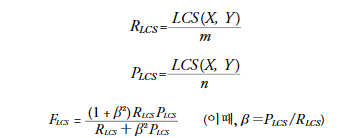

? Î≤†ÌÉÄÏùò ÏùòÎØ∏Í∞Ä Î≠îÏßÄ Ï∂îÍ∞Ä Ïä§ÌÑ∞Îîî ÌïÑÏöî!!!

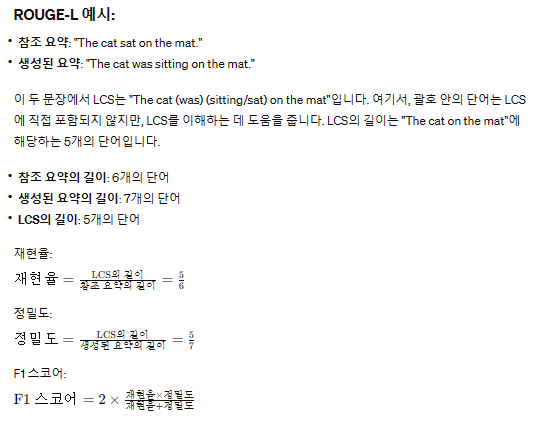

1. ROUGE-L = Î¨∏Ïû•ÎßàÎã§ Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú ÏöîÏïΩÏóê ÎåÄÌï¥ ÌèâÍ∑†Ìïú Ï†êÏàò
2. ROUGE-Lsum = Ï†ÑÏ≤¥ ÏöîÏïΩÏóê ÎåÄÌï¥ Í≥ÑÏÇ∞Ìïú Ï†êÏàò

In [ ]:
rouge_metric = evaluate.load("rouge")

In [ ]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

rouge1    rouge2    rougeL  rougeLsum
baseline  0.303571  0.090909  0.214286   0.232143
gpt2      0.145833  0.021277  0.145833   0.145833
t5        0.486486  0.222222  0.378378   0.486486
bart      0.582278  0.207792  0.455696   0.506329
pegasus   0.866667  0.655172  0.800000   0.833333

ÎÖºÎ¨∏ÏóêÏÑúÎäî CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú<br>
PEGASUS Í≤∞Í≥ºÍ∞Ä T5 Î™®Îã§ Îõ∞Ïñ¥ÎÇòÎ©∞ Ï†ÅÏñ¥ÎèÑ BARTÏóê Í≤¨Ï§Ñ ÎßåÌïòÎã§Í≥† Í∏∞ÎåÄ

‚Äª ROUGE ÏßÄÌëúÎäî Ïã†Î¢∞Íµ¨Í∞ÑÎèÑ Í≥ÑÏÇ∞(Î∞±Î∂ÑÏúÑ 5~95)

## 6.5 CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú PEGASUS ÌèâÍ∞ÄÌïòÍ∏∞

In [18]:
!pip install evaluate

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 1.7 MB/s eta 0:00:00


In [19]:
# Ïù¥ ÏÖÄÏùÄ ÎÖ∏Ìä∏Î∂Å Ï§ëÍ∞ÑÎ∂ÄÌÑ∞ Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú Í≤ÉÏûÖÎãàÎã§.
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import evaluate
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# "cnn_dailymail" Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ΩÏö∞ ÎåÄÏã† "ccdv/cnn_dailymail"ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
# dataset = load_dataset("cnn_dailymail", version="3.0.0")
dataset = load_dataset("cnn_dailymail", version="3.0.0")
rouge_metric = evaluate.load("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

ValueError: At least one data file must be specified, but got data_files=None

In [ ]:
def evaluate_summaries_baseline(dataset, metric,
                                column_text="article",
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])
    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000)) #select(range(10))

score = evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

rouge1    rouge2   rougeL  rougeLsum
baseline  0.388019  0.170517  0.24714   0.354912

Îπî ÏÑúÏπò...Í≥†Î†§ÌïòÎ©¥ Forward Ïó∞ÏÇ∞ ÌöüÏàò xÎ∞∞Î°ú ÎäòÏñ¥ÎÇúÎã§.<br>
ÏãúÍ∞Ñ Ïò§ÎûòÍ±∏Î¶∞Îã§...

-----------------------------------------------


Ïã§ÌñâÌïòÏßÄ ÏïäÍ≥† ÏùòÎØ∏Îßå Ìï¥ÏÑù

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ°ú Ï£ºÏñ¥ÏßÑ Î¶¨Ïä§Ìä∏Î•º ÎÇòÎàÑÎäî Ìï®Ïàò
def chunks(list_of_elements, batch_size):
    """list_of_elementsÎ°úÎ∂ÄÌÑ∞ batch_size ÌÅ¨Í∏∞Ïùò Ï≤≠ÌÅ¨Î•º Ïó∞ÏÜçÏ†ÅÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§"""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):
        # ÌÜ†ÌÅ∞Ìôî
        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")
        # ÏöîÏïΩ Ïã§Ìñâ
        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        # ÏÇ¨Î¶ºÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú ÎîîÏΩîÎî©
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        # Ïó¨Îü¨ ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï∞æÏïÑÎ≥º Ïàò ÏûàÎäî Ìï®Ïàò
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    score = metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [23:44<00:00, 11.39s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.427195  0.207378  0.305054    0.36919

In [ ]:
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.427195  0.207378  0.305054    0.36919

## 6.6 ÏöîÏïΩ Î™®Îç∏ ÌõàÎ†®ÌïòÍ∏∞

SAMSum Îç∞Ïù¥ÌÑ∞ÏÖã: ÎåÄÌôî + ÏßßÏùÄ ÏöîÏïΩ<br>
Í≥†Í∞ù ÏßÄÏõê ÏÑºÌÑ∞Ïö©<br>


In [ ]:
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Î∂ÑÌï† ÌÅ¨Í∏∞: {split_lengths}")
print(f"ÌäπÏÑ±: {dataset_samsum['train'].column_names}")
print("\nÎåÄÌôî:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Î∂ÑÌï† ÌÅ¨Í∏∞: [14732, 819, 818]
ÌäπÏÑ±: ['id', 'dialogue', 'summary']

ÎåÄÌôî:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


### 6.6.1 SAMSumÏóêÏÑú PEGASUS ÌèâÍ∞ÄÌïòÍ∏∞

In [ ]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("ÏöîÏïΩ:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

ÏöîÏïΩ:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


ROUGE ÌèâÍ∞Ä(ÏûêÎèôÏöîÏïΩÏãúÏä§ÌÖú ÌèâÍ∞Ä)

In [ ]:
score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=8)

rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 103/103 [06:34<00:00,  3.83s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.296038  0.087469  0.229174   0.229574

‚Üí ÌèâÍ∞ÄÍ∞Ä Ï¢ãÏßÄ ÏïäÏùÄ Ïù¥Ïú†Îäî CNN/DailyMail Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ SAMSumÍ≥º Îã§Î•¥Í∏∞ ÎïåÎ¨∏

### 6.6.2 PEGASUS ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

ÏûÖÎ†•, Ï∂úÎ†• Í∏∏Ïù¥ Î∂ÑÌè¨

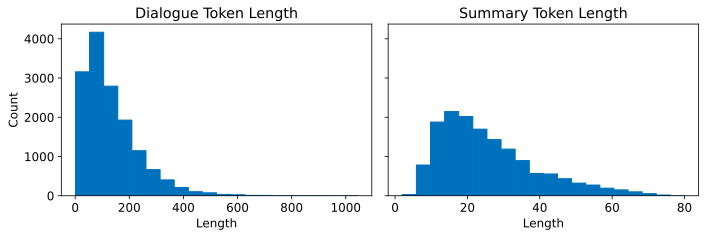

In [ ]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

‚Üí ÌÜ†ÌÅ∞Ïù¥ 400ÎØ∏ÎßåÏóê Î™∞Î†§ÏûàÍ≥†, ÏöîÏïΩ ÌÜ†ÌÅ∞ Í∏∏Ïù¥ÎèÑ 20 Î∂ÄÍ∑ºÏóê Î™∞Î†§ÏûàÏùå

Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞ ÎßåÎì§Í∏∞: Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïù¥ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎèÑÎ°ù Ï†ÅÏ†àÌïú ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÍ±∞ÎÇò Ï°∞Ï†ï<br>
ÎåÄÌôî ÏµúÎåÄ Í∏∏Ïù¥: 1024<br>
ÏöîÏïΩ ÏµúÎåÄ Í∏∏Ïù¥: 128

In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,
                                truncation=True)

    # with tokenizer.as_target_tokenizer():                                     # ÎîîÏΩîÎçî ÏûÖÎ†•Ïóê ÌäπÏàò ÌÜ†ÌÅ∞ ÌïÑÏöî, ÎîîÏΩîÎçîÎ•º ÏúÑÌïú ÌÜ†ÌÅ∞ÌôîÏûÑÏùÑ Ïù∏ÏßÄ
    target_encodings = tokenizer(text_target=example_batch["summary"], max_length=128,
                                    truncation=True)

    return {"input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "labels": target_encodings["input_ids"]}

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features,
                                       batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

PEGASUS: Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ìä∏ÎûúÏä§Ìè¨Î®∏, Í≥†Ï†ÑÏ†ÅÏù∏ seq2seq Íµ¨Ï°∞

In [20]:
# Ìã∞Ï≤ò Ìè¨Ïã±(teacher forcing): seq2seqÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Íµ¨Ï°∞
# ÌÖçÏä§Ìä∏ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎîîÏΩîÎçî ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏùò Ï†ïÎ†¨
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

decoder_input          label
step                                                             
1                                            [PAD]   Transformers
2                              [PAD, Transformers]            are
3                         [PAD, Transformers, are]        awesome
4                [PAD, Transformers, are, awesome]            for
5           [PAD, Transformers, are, awesome, for]           text
6     [PAD, Transformers, are, awesome, for, text]  summarization

‚Äª Teacher Forcing Îã§Î•∏ ÏòàÏãú

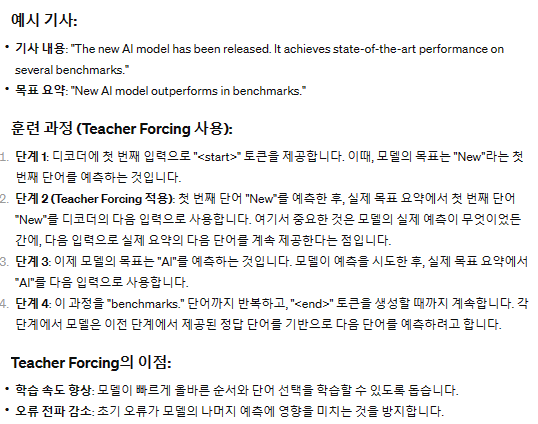

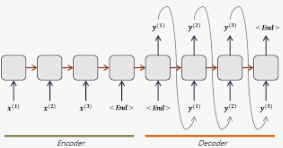

DataCollatorForSeq2SeqÎäî Î†àÏù¥Î∏îÏùÑ Ìïú Ïä§ÌÖù Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥ÎèôÏãúÏºú ÎîîÏΩîÎçî ÏûÖÎ†•ÏùÑ ÎßåÎì§Í≥† Î†àÏù¥Î∏îÏóê ÏûàÎäî Ìå®Îî© ÌÜ†ÌÅ∞ÏùÑ -100ÏúºÎ°ú ÏÑ§Ï†ïÌï¥ ÏÜêÏã§Ìï®ÏàòÍ∞Ä Î¨¥ÏãúÌïòÎèÑÎ°ù Ï≤òÎ¶¨

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10, push_to_hub=True,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
trainer = Trainer(model=model, args=training_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

In [ ]:
trainer.train()
score = evaluate_summaries_pegasus(
    dataset_samsum["test"], rouge_metric, trainer.model, tokenizer,
    batch_size=2, column_text="dialogue", column_summary="summary")

rouge_dict = dict((rn, score[rn]) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

{'loss': 3.0125, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 3.0757, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 3.0213, 'learning_rate': 3e-06, 'epoch': 0.03}
{'loss': 2.9847, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04}
{'loss': 2.9439, 'learning_rate': 5e-06, 'epoch': 0.05}
{'loss': 2.8873, 'learning_rate': 6e-06, 'epoch': 0.07}
{'loss': 2.8093, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.08}
{'loss': 2.61, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.09}
{'loss': 2.6594, 'learning_rate': 9e-06, 'epoch': 0.1}
{'loss': 2.3474, 'learning_rate': 1e-05, 'epoch': 0.11}
{'loss': 2.3726, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.12}
{'loss': 2.2398, 'learning_rate': 1.2e-05, 'epoch': 0.13}
{'loss': 2.1204, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.14}
{'loss': 2.1171, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.15}
{'loss': 2.0179, 'learning_rate': 1.5e-05, 'epoch': 0.16}
{'loss': 2.0695, 'learning

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 410/410 [09:00<00:00,  1.32s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.429515  0.196094  0.341059   0.341279

In [ ]:
pd.DataFrame(rouge_dict, index=[f"pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.429515  0.196094  0.341059   0.341279

In [ ]:
trainer.push_to_hub("Training complete!")

training_args.bin:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

'https://huggingface.co/haesun/pegasus-samsum/tree/main/'

### 6.6.3 ÎåÄÌôî ÏöîÏïΩ ÏÉùÏÑ±ÌïòÍ∏∞

In [ ]:
import transformers
transformers.logging.set_verbosity_error()

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]
# `haesun`Î•º ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
pipe = pipeline("summarization", model="???/pegasus-samsum")

print("ÎåÄÌôî:")
print(sample_text)
print("\nÏ∞∏Ï°∞ ÏöîÏïΩ:")
print(reference)
print("\nÎ™®Îç∏ ÏöîÏïΩ:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

ÎåÄÌôî:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him üôÇ
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Ï∞∏Ï°∞ ÏöîÏïΩ:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.

Î™®Îç∏ ÏöîÏïΩ:
Amanda can't find Betty's number. Larry called Betty last time they were at the
park together. Hannah would rather she text him. Amanda will text him.


In [ ]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis, Leandro and Leandro are going to write a book about transformers.
They are going to do it together, but it's not easy.


## 6.7 Í≤∞Î°†

Î≠êÎì† ÏÇ¨ÎûåÏùò ÌåêÎã®Ïù¥ ÏïÑÏßÅÏùÄ Í∞ÄÏû• Ï¢ãÏùÄ Ï≤ôÎèÑ<br>
Î™®Îç∏Ïùò Î¨∏Îß• ÏΩîÍ∏∞Î≥¥Îã§ Í∏¥ ÌÖçÏä§Ìä∏Î•º Ïñ¥ÎñªÍ≤å ÏöîÏïΩÌï†ÏßÄÍ∞Ä Î¨∏Ï†ú...<br>
